In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## csv = https://raw.githubusercontent.com/vkoul/data/main/misc/ride_data.csv

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vkoul/data/main/misc/ride_data.csv', parse_dates=['Request timestamp', 'Drop timestamp'])
#Parse date whilst reading data
#Default is US month first.  Day fist can be acheived by adding ,dayfirst = True

In [4]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00


In [ ]:
df.info()

## Check for missing values

In [6]:
df.isna().sum()  #how many missing values

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
#percentage of missing values
df.isna().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [8]:
#or
df.isna().mean()*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
#Clean data
df.columns  #get column headers

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [11]:
df.columns.str.lower()  #covert to lower case

Index(['request id', 'pickup point', 'driver id', 'status',
       'request timestamp', 'drop timestamp'],
      dtype='object')

In [12]:
df.columns.str.replace(" ","_")  #replace space with _

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp'],
      dtype='object')

In [13]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [14]:
df.head(2)  #check on data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT


## Approaches

In [15]:
#any association between time and cancellation
#Driver ID and cancellation - are there any problematic drivers?
#Problematic location and time?
#Problematic driver?
#why so many NAs in the droptime? - confirm whether NAs are due to incompleted trips
#Availablility of drivers in slots/ peak hours
#calculate the length of the journey based on time
#number of trips per driver per day - are some doing more than others? - distribution of spread
#divide the day into hour slots and see the pattern- if most flights are arriving am, need more drivers available at airport
#length of trips per driver

#extract relevant info from time stamps - hour, month, etc
#assuming it's an instant request not pre bookings - if interview question, could ask clarifying questions

 # Extract relevant ino from timestamp columns

In [16]:
df['request_year'] = df['Request timestamp'].dt.year  #dt is the date time function

In [17]:
df['request_month'] = df['Request timestamp'].dt.month    #type_name() at the end to give month names

In [18]:
df['request_hour'] = df['Request timestamp'].dt.hour  #0 hour is midnight

In [19]:
df.tail(2)  #check last 2 columns

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_year,request_month,request_hour
6743,6765,Airport,NaN,No Cars Available,2016-07-15 00:09:00,NaT,2016,7,0
6744,6766,City,108.0,Trip Completed,2016-07-15 00:06:00,2016-07-15 01:10:00,2016,7,0


In [20]:
#do the same above for drop timestamp
df['drop_year'] = df['Drop timestamp'].dt.year

In [21]:
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_year,request_month,request_hour,drop_year
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,0,2016.0
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,0,NaN


In [22]:
df['drop_day'] = df['Drop timestamp'].dt.day_name()  #gives day of week

In [23]:
df.head(2)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_year,request_month,request_hour,drop_year,drop_day
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,0,2016.0,Monday
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,0,NaN,NaN


## calculate trip time

In [24]:
df['timestamp'] = df['Drop timestamp'] - df['Request timestamp']

In [25]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,request_year,request_month,request_hour,drop_year,drop_day,timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,2016,11,0,2016.0,Monday,0 days 00:31:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016,11,0,NaN,NaN,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,2016,11,0,2016.0,Monday,0 days 01:07:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,2016,11,0,NaN,NaN,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,2016,11,0,2016.0,Monday,0 days 00:59:00
5,6,City,NaN,No Cars Available,2016-11-07 00:36:00,NaT,2016,11,0,NaN,NaN,NaT
6,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT,2016,11,0,NaN,NaN,NaT
7,8,City,NaN,No Cars Available,2016-11-07 00:40:00,NaT,2016,11,0,NaN,NaN,NaT
8,9,Airport,235.0,Trip Completed,2016-11-07 00:45:00,2016-11-07 02:00:00,2016,11,0,2016.0,Monday,0 days 01:15:00
9,10,City,228.0,Trip Completed,2016-11-07 00:54:00,2016-11-07 01:59:00,2016,11,0,2016.0,Monday,0 days 01:05:00


In [ ]:
df.info()

## EDA = Univariate Analysis - when you focus on one column at a time.  Bivariate is when you start to compare columns

In [27]:
df.describe()  #shows minimum and max values - ie request month from July to Dec only
#check outliers, ie, max trip 29 days - check

,Request id,Driver id,request_year,request_month,request_hour,drop_year,timestamp
count,6745.000000,4095.000000,6745.0,6745.000000,6745.000000,2831.0,2831
mean,3384.644922,149.501343,2016.0,8.779540,12.956709,2016.0,-1 days +13:14:01.759095726
std,1955.099667,86.051994,0.0,2.218331,6.504052,0.0,10 days 07:07:53.473784496
min,1.000000,1.000000,2016.0,7.000000,0.000000,2016.0,-148 days +00:33:00
25%,1691.000000,75.000000,2016.0,7.000000,7.000000,2016.0,0 days 00:41:00
50%,3387.000000,149.000000,2016.0,7.000000,13.000000,2016.0,0 days 00:52:00
75%,5080.000000,224.000000,2016.0,11.000000,19.000000,2016.0,0 days 01:04:00
max,6766.000000,300.000000,2016.0,12.000000,23.000000,2016.0,29 days 01:15:00


In [28]:
df.describe(include='O')  #shows the most common variables

,Pickup point,Status,drop_day
count,6745,6745,2831
unique,2,3,5
top,City,Trip Completed,Wednesday
freq,3507,2831,1137


###### what about trip status and pick up point

In [29]:
df['Status'].value_counts()  #frequency.

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [30]:
df['Status'].value_counts(normalize= True)  #gives frequency in percentages
#more journeys were cancelled/ no car available than actual completed trips - too popular for no. drivers

Trip Completed       0.419718
No Cars Available    0.392884
Cancelled            0.187398
Name: Status, dtype: float64

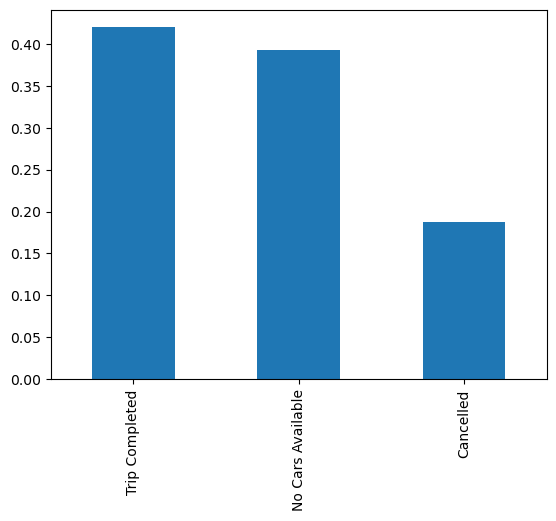

In [31]:
#trip status
df['Status'].value_counts(normalize= True).plot(kind ='bar');  #easy way to visulise data set ; gets rid of writing at start

In [32]:
#Distribution of pickups for airport and city
pd.crosstab(df['Status'], df['Pickup point'])

Pickup point,Airport,City
Status,,
Cancelled,198,1066
No Cars Available,1713,937
Trip Completed,1327,1504


In [33]:
pd.crosstab(df['Status'], df['Pickup point'], normalize=True)  #adding up all 6 of table above and dividing each cell by total
#to get percentages below

Pickup point,Airport,City
Status,,
Cancelled,0.029355,0.158043
No Cars Available,0.253966,0.138918
Trip Completed,0.196738,0.222980


In [34]:
#to do the percentages per column or rows then and round to 2dp
pd.crosstab(df['Status'], df['Pickup point'], normalize='columns').round(2)
#unavailablity of cars is bigger issue at airport than city - dig down to find out what time/ distribution is.  Slice and dice data to find out more
#slice and dice pick up point and status

Pickup point,Airport,City
Status,,
Cancelled,0.06,0.30
No Cars Available,0.53,0.27
Trip Completed,0.41,0.43


###### which are the busy hours? - use request hours

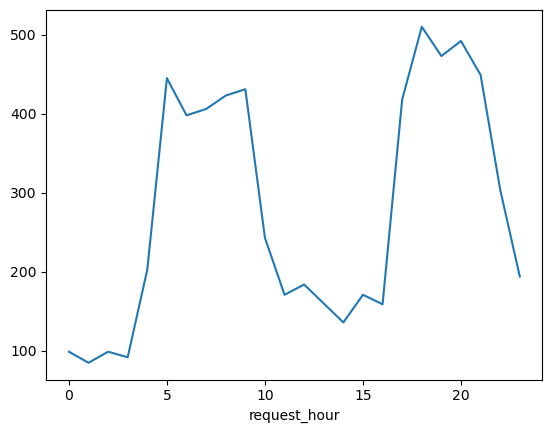

In [35]:
df.groupby('request_hour')['Request id'].count().plot(kind = 'line');
#across month and both pick up points - need to slice and dice for specifics

In [55]:
(df
 .query('Pickup point == "Airport"')
 .groupby('request_hour')['Request id'].count().plot(kind = 'line'))
#should run a line graph just for pick up airport - why error?

SyntaxError: invalid syntax (<unknown>, line 1)

In [53]:
(df.query('Pickup point == "City"').groupby('request_hour')['Request id'].count().plot(kind = 'line'));
#run again for city but same error
#compare the 2
#Demand pattern is very different

SyntaxError: invalid syntax (<unknown>, line 1)

In [58]:
df['Pickup point'].value_counts(normalize=True).round(2)
#shows percentage of pickups very similar for both locations

City       0.52
Airport    0.48
Name: Pickup point, dtype: float64

## Daywise - slice and dice

In [56]:
#change day name to number to ensure in chronoglogical order - data only for monday to friday (5 days)
df['request_day'] = df['Request timestamp'].dt.dayofweek

In [57]:
(df.query('Pickup point == "City"').groupby('request_day')['Request id'].count().plot(kind = 'line'));
#need to try and do 2 lines to compare day and hours
##same error

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
# plotly gives interactive chart so on charts above, after (kind = 'line', backend = 'plotly')

## Trip status across pick up points
#to figure out

###### Hourly pickup status across the 2 places
#to figure out